<a href="https://colab.research.google.com/github/ArifIkbal140/AI_lab_colab/blob/main/assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Assignment3 ok

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Input


In [ ]:
#Dataset preparation
x = np.linspace(-10, 10, 1000)
y = 5*x + 10
print(x.shape)
x = x.reshape(-1,1)
y = y.reshape(-1,1)
print(x.shape)

(1000,)
(1000, 1)


In [ ]:
#train,val,test split

x_train, x_temp, y_train, y_temp = train_test_split(x,y, test_size = 0.30, random_state = 42)
x_val, x_test , y_val, y_test = train_test_split(x_temp, y_temp, test_size= 50, random_state = 42)

print("training samples:",len(x_train))
print("validation samples:",len(x_val))
print("testing samples:",len(x_test))

training samples: 700
validation samples: 250
testing samples: 50


In [ ]:
#Build FCFNN model;

model = Sequential([
    Dense(8, activation = 'relu', input_shape=(1,)),
    Dense(16, activation = 'relu'),
    Dense(32, activation = 'relu'),
    Dense(16, activation = 'relu'),
    Dense(32, activation = 'relu'),
    Dense(16, activation = 'relu'),
    Dense(1, activation = 'linear')
])


model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                │ (None, 8)              │            16 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,321 (9.07 KB)

 Trainable params: 2,321 (9.07 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#compile the model

model.compile(
    optimizer = 'adam',
    loss = 'mse',
    metrics = ['mae']

)

In [ ]:
#train the model

history = model.fit(
    x_train, y_train,
    validation_data = (x_val, y_val),
    epochs = 10,
    batch_size = 32
)

Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - loss: 913.7465 - mae: 25.4444 - val_loss: 889.6416 - val_mae: 25.1501
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 833.3168 - mae: 24.1540 - val_loss: 766.9427 - val_mae: 22.7730
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 695.9717 - mae: 21.5707 - val_loss: 508.7018 - val_mae: 16.9426
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 410.7133 - mae: 15.2549 - val_loss: 152.6468 - val_mae: 9.9057
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 77.0119 - mae: 6.9346 - val_loss: 15.4934 - val_mae: 3.0772
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 11.3656 - mae: 2.6225 - val_loss: 4.2897 - val_mae: 1.6553
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.8393 - mae: 1.5135 - val_loss: 2.8677 - val_mae: 1.2770
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.4480 - mae: 1.1483 - val_loss: 2.3014 - val_mae: 1.0376
Epoch 9/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/

In [ ]:
#test the model

test_loss, test_mae = model.evaluate(x_test, y_test)
print("Test MSE:", test_loss)
print("Test MAE:", test_mae)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step - loss: 1.7547 - mae: 0.9245
Test MSE: 1.8245255947113037
Test MAE: 0.9289155006408691


In [ ]:
#prediction of y

y_pred = model.predict(x)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


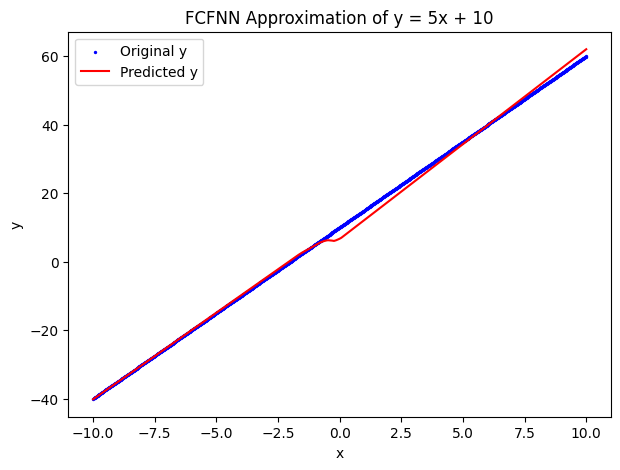

In [ ]:
#plot original vs predicted

plt.figure(figsize=(7,5))
plt.scatter(x, y, color='blue', s=2, label="Original y")
plt.plot(x, y_pred, color='red', label="Predicted y")
plt.xlabel("x")
plt.ylabel("y")
plt.title("FCFNN Approximation of y = 5x + 10")
plt.legend()
plt.show()
